In [ ]:
# Environment Setup
!pip install h5py
!pip install typing-extensions
!pip install wheel
!rm -rf global-chem
!git clone -q https://github.com/Sulstice/global-chem

!pip install -q global-chem-extensions --upgrade

In [ ]:
# Header

from global_chem import GlobalChem
from global_chem_extensions import GlobalChemExtensions

gc = GlobalChem()
gce = GlobalChemExtensions()

In [ ]:
# GlobalChem Molecule

global_chem_molecule = gce.initialize_globalchem_molecule('C1CCCC1')
attributes = global_chem_molecule.get_attributes()
print (attributes)

{'molecular_weight': 70.07825032, 'logp': 1.9505000000000001, 'h_bond_donor': 0, 'h_bond_acceptors': 0, 'rotatable_bonds': 0, 'number_of_atoms': 5, 'molar_refractivity': 23.084999999999994, 'topological_surface_area_mapping': 0.0, 'formal_charge': 0, 'heavy_atoms': 5, 'num_of_rings': 1}


In [ ]:
# CGenFF Functions

# Read in CGenFF Molecule

cgenff_molecule = gce.initialize_cgenff_molecule(
    'global-chem/example_data/forcefield_parameterization/perfluorobutanoic_acid.str'
)

cgenff_molecule.update_bonded_dataframe(
    'CG302-CG312-CG312',
     200,
     force_constant=True,
     harmonic_value=False,
     multiplicity=False
)

# print (cgenff_molecule)
# print (cgenff_molecule.convert_to_smiles())
# print (cgenff_molecule.bond_parameters)
# print (cgenff_molecule.angle_parameters)
# print (cgenff_molecule.dihedral_parameters)

cgenff_molecule.write_stream_file('new.str')

!cat new.str

In [ ]:
# GAFF2 Functions

# Read in GAFF2 Molecule

gaff2_molecule = gce.initialize_gaff2_molecule(
    'global-chem/example_data/forcefield_parameterization/amber_gws.frcmod'
)

gaff2_molecule.update_bonded_dataframe(
    'ca-ca-ns-hn',
     200,
     force_constant=True,
     harmonic_value=False,
     multiplicity=False,
     fluctuation=False,
)

# print (gaff2_molecule)
# print (gaff2_molecule.dihedral_parameters)

gaff2_molecule.write_frcmod_file('new.frcmod')

!cat new.frcmod


Remark line goes here
MASS
BONDS
ca-ns	1.412	315.20
c-ns	1.379	356.20
hn-ns	1.013	527.30

ANGLE
c-ns-ca	123.710	65.700
ca-ns-hn	116.000	48.000
ns-c-o	123.050	113.800
c-ns-hn	117.550	48.700
ca-ca-ns	120.190	85.600
c3-c-ns	115.180	84.300

DIHE
o-c-ns-ca	4	10.000	180.000	2.000
c3-c-ns-ca	1	0.750	180.000	-2.000
c3-c-ns-ca	1	0.500	0.000	3.000
o-c-ns-hn	1	2.500	180.000	-2.000
o-c-ns-hn	1	2.000	0.000	1.000
ca-ca-ns-c	1	0.950	180.000	2.000
ns-c-c3-c3	1	0.000	180.000	-4.000
ns-c-c3-c3	1	0.710	180.000	2.000
ca-ca-ns-hn	4	1.800	180.000	2.000
c3-c-ns-hn	4	10.000	180.000	2.000

IMPROPER
ca-ca-ca-ns-1.1	180.0	2.0 
ca-ca-ca-ha-1.1	180.0	2.0 
c3-ns-c-o-10.5	180.0	2.0 
c-ca-ns-hn-1.1	180.0	2.0 
ca-h4-ca-nb-1.1	180.0	2.0 


NONBON
ca-h4	1.1	180.0
ca-h4	1.1	180.0


In [ ]:
# Compute CGenFF Dissimmilarity Score Between Two Molecule CGenFF Stream File

dissimilar_score = gce.compute_cgenff_dissimilar_score(
    'global-chem/example_data/forcefield_parameterization/perfluorobutanoic_acid.str',
    'global-chem/example_data/forcefield_parameterization/perfluorohexanoic_acid.str',
)

print ("CGenFF Dissimilar Score: %s" % dissimilar_score)


CGenFF Dissimilar Score: 26


In [ ]:
# Check the Validity of the SMILES

smiles_list = gc.get_all_smiles()

sucesses, failures = gce.verify_smiles(
    smiles_list,
    rdkit=False, 
    partial_smiles=False,
    return_failures=True,
    pysmiles=False,
    molvs=False,
    deepsmiles=True
)

total = len(sucesses) + len(failures)
print ("Percantage of Accepted SMILES: %s" % ((len(sucesses) / total) * 100))

Percantage of Accepted SMILES: 99.25666812418015


In [ ]:
# Sunbursting

gc.build_global_chem_network(print_output=False, debugger=False)
smiles_list = list(gc.get_node_smiles('emerging_perfluoroalkyls').values())
GlobalChemExtensions().sunburst_chemical_list(smiles_list, save_file=False)

In [ ]:
# PCA Analysis

gc.build_global_chem_network(print_output=False, debugger=False)
node = gc.get_node_smiles('pihkal')
smiles_list = list(node.values())
names_list = list(node.keys())

for k, v in node.items():
  print (k, v)
GlobalChemExtensions().node_pca_analysis(smiles_list, save_file=False)


alpha-ethylmescaline CCC(N)CC1=CC(=C(OC)C(=C1)OC)OC
4-allyloxy-3,5-dimethoxyphenethylamine COC1=CC(=CC(=C1OCC=C)OC)CCN
2,5-dimethoxy-4-methylthioamphetamine COC1=CC(=C(OC)C=C1CC(C)N)SC
2,5-dimethoxy-4-ethylthioamphetamine CCSC1=C(OC)C=C(CC(C)N)C(=C1)OC
2,5-dimethoxy-4-(i)-propylthioamphetamine COC1=CC(=C(OC)C=C1CC(C)N)SC(C)C
2,5-dimethoxy-4-phenylthioamphetamine COC1=CC(=C(OC)C=C1CC(C)N)SC2=CC=CC=C2
2,5-dimethoxy-4-(n)-propylthioamphetamine CCCSC1=C(OC)C=C(CC(C)N)C(=C1)OC
dimoxamine CCC(N)CC1=CC(=C(C)C=C1OC)OC
asymbescaline CCOC1=CC(=CC(=C1OCC)OC)CCN
buscaline CCCCOC1=C(OC)C=C(CCN)C=C1OC
2,5-dimethoxy-4,n-dimethylamphetamine CNC(C)CC1=CC(=C(C)C=C1OC)OC
4-methyl-2,5-bis-(methylthio)amphetamine CSC1=C(C)C=C(SC)C(=C1)CC(C)N
4-bromo-2,5-beta-trimethoxyphenethylamine COC(CN)C1=CC(=C(Br)C=C1OC)OC
4-methyl-2,5,beta-trimethoxyphenethylamine COC(CN)C1=CC(=C(C)C=C1OC)OC
beta-methoxy-3,4-methylenedioxyphenethylamine COC(CN)C1=CC(=C(C)C=C1OC)OC
2,5-dimethoxy-beta-hydroxy-4-methylphenethylamine CC1

In [ ]:
# Deep Layering

gc.initiate_deep_layer_network()
gc.add_deep_layer(
    [
        'emerging_perfluoroalkyls',
        'montmorillonite_adsorption',
        'common_monomer_repeating_units',
        'vitamins',
        'schedule_two',
    ]
)
gc.add_deep_layer(
    [
        'common_warheads_covalent_inhibitors',
        'privileged_scaffolds',
        'iupac_blue_book',
        'schedule_four',
        'schedule_one',
    ]
)

gc.print_deep_network()
deep_layer_network = gc.deep_layer_network
print (deep_layer_network)

                                      ┌common_warheads_covalent_inhibitors
                                      ├privileged_scaffolds
            ┌emerging_perfluoroalkyls─├iupac_blue_book
            │                         ├schedule_four
            │                         └schedule_one
            │                           ┌common_warheads_covalent_inhibitors
            │                           ├privileged_scaffolds
            ├montmorillonite_adsorption─├iupac_blue_book
            │                           ├schedule_four
            │                           └schedule_one
            │                               ┌common_warheads_covalent_inhibitors
            │                               ├privileged_scaffolds
global_chem─├common_monomer_repeating_units─├iupac_blue_book
            │                               ├schedule_four
            │                               └schedule_one
            │         ┌common_warheads_covalent_inhibitors
            │   

In [ ]:
# Amino Acids

amino_acid_test = ['RSTEFGHIKLADPQ']
smiles = gce.amino_acids_to_smiles(amino_acid_test)
print (smiles)

amino_acid = gce.smiles_to_amino_acids(smiles)
print (amino_acid)

['NC(CCCCNC(N)=N)C(NC(CO)C(NC(C(C)([H])O)C(NC(CCC(O)=O)C(NC(CC1=CC=CC=C1)C(NC([H])C(NC(CC1=CNC=N1)C(NC(C(CC)([H])C)C(NC(CCCCN)C(NC(CC(C)C)C(NC(C)C(NC(CC(O)=O)C(NC(C2CCCN2)C(NC(CCC(N)=O)C(NCC(O)=O)=O)=O)=O)=O)=O)=O)=O)=O)=O)=O)=O)=O)=O)=O']
['RSTEFGHIKLADPQ', None]


In [ ]:
# Database Monitoring

GlobalChemExtensions.check_status_on_open_source_databases()

 Zinc 15
 Zinc 20
 PubChem
 NIST Chemistry Webhook
 Chem Exper
 NMR Shift Database
 Drug Bank
 Binding Database
 Spectral Database for Organic Compounds
 Sider
 ChemSpider
 Stitch
 CardPred
 Comparative Toxicogenomics Database
 AMED Cardiotoxicity Database
 Tox21
 Drug Safety Analysis System
 OpenFDA
 Metabolites Biological Role
 MetaboAnalyst
 Adverse Drug Reaction Classification System
 Metabolism and Transport Database
 Ecology Toxicity 
 Human and Environment Risk Assessment 
 International Toxicity Information for Risk Assesments
 Japan Exisiting Database
 National Pesticide Center
 Pesticide Info
 Kyoto Encyclopedia of Genes and Genomes
 Hetereocycles
 Chemical Resolver
 LookChem
 Lipid Maps


In [ ]:
# Drug Filtering

gc.build_global_chem_network(print_output=False, debugger=False)
smiles_list = list(gc.get_node_smiles('emerging_perfluoroalkyls').values())

filtered_smiles = GlobalChemExtensions.filter_smiles_by_criteria(
    smiles_list,
    lipinski_rule_of_5=True,
    ghose=False,
    veber=False,
    rule_of_3=False,
    reos=False,
    drug_like=False,
    pass_all_filters=False
)

print (filtered_smiles)

['O=C(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F', 'O=C(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F', 'O=S(=O)(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F', 'O=S(=O)(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F', 'FC(F)(F)C1(F)OC1(F)F', 'O=C(O)C(F)(F)C(F)(F)C(F)(F)F', 'O=C(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F', 'O=S(=O)(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F']


In [ ]:
# One Hot Encoding your SMILES

gc.build_global_chem_network(print_output=False, debugger=False)
smiles_list = list(gc.get_node_smiles('pihkal').values())

encoded_smiles = GlobalChemExtensions.encode_smiles(smiles_list, max_length=200)

print ('Encoded SMILES: %s' % encoded_smiles[0])

decoded_smiles = GlobalChemExtensions.decode_smiles(encoded_smiles)

print ('Decoded SMILES: %s' % decoded_smiles[0])


Encoded SMILES: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Decoded SMILES: CCC(N)CC1=CC(=C(OC)C(=C1)OC)OC                                                                                                                                                                          


In [ ]:
# Convert into Networkx

gc.build_global_chem_network(print_output=False, debugger=False)
network = gc.network
networkx_graph = GlobalChemExtensions.convert_to_networkx(network)
print (networkx_graph.nodes.data())

[('global_chem', {}), ('', {}), ('organic_synthesis', {}), ('solvents', {}), ('common_organic_solvents', {}), ('protecting_groups', {}), ('amino_acid_protecting_groups', {}), ('interstellar_space', {}), ('environment', {}), ('emerging_perfluoroalkyls', {}), ('miscellaneous', {}), ('amino_acids', {}), ('open_smiles', {}), ('vitamins', {}), ('regex_patterns', {}), ('materials', {}), ('clay', {}), ('montmorillonite_adsorption', {}), ('polymers', {}), ('common_monomer_repeating_units', {}), ('narcotics', {}), ('schedule_two', {}), ('pihkal', {}), ('schedule_one', {}), ('schedule_three', {}), ('schedule_four', {}), ('schedule_five', {}), ('medicinal_chemistry', {}), ('cannabinoids', {}), ('rings', {}), ('rings_in_drugs', {}), ('iupac_blue_book_rings', {}), ('phase_2_hetereocyclic_rings', {}), ('warheads', {}), ('electrophillic_warheads_for_kinases', {}), ('common_warheads_covalent_inhibitors', {}), ('scaffolds', {}), ('privileged_scaffolds', {}), ('common_r_group_replacements', {}), ('iupac

In [ ]:
# Protonation over a range of Ph

gce.find_protonation_states(
    ['CC(=O)O'],
    min_ph=4.0,
    max_ph=8.1,
    pka_precision=1.0,
    max_variants=128,
    label_states=False,
    )

{'CC(=O)O': ['CC(=O)O', 'CC(=O)[O-]']}

In [ ]:
# PDF Generation & Parsing

gc.build_global_chem_network(print_output=False, debugger=False)
smiles_list = list(gc.get_node_smiles('pihkal').values())

gce.smiles_to_pdf(
    smiles=smiles_list,
    labels = [],
    file_name = 'molecules.pdf',
    include_failed_smiles = True,
    title = 'MY MOLECULES',
)

molecules = gce.pdf_to_smiles(
    'molecules.pdf',
)

print (molecules)


Method: 'generate' Time: 0.98 seconds
[b'CCC(N)CC1=CC(=C(OC)C(=C1)OC)OC', b'COC1=CC(=CC(=C1OCC=C)OC)CCN', b'COC1=CC(=C(OC)C=C1CC(C)N)SC', b'CCSC1=C(OC)C=C(CC(C)N)C(=C1)OC', b'COC1=CC(=C(OC)C=C1CC(C)N)SC(C)C', b'COC1=CC(=C(OC)C=C1CC(C)N)SC2=CC=CC=C2', b'CCCSC1=C(OC)C=C(CC(C)N)C(=C1)OC', b'CCC(N)CC1=CC(=C(C)C=C1OC)OC', b'CCOC1=CC(=CC(=C1OCC)OC)CCN', b'CCCCOC1=C(OC)C=C(CCN)C=C1OC', b'CNC(C)CC1=CC(=C(C)C=C1OC)OC', b'CSC1=C(C)C=C(SC)C(=C1)CC(C)N', b'COC(CN)C1=CC(=C(Br)C=C1OC)OC', b'COC(CN)C1=CC(=C(C)C=C1OC)OC', b'COC(CN)C1=CC(=C(C)C=C1OC)OC', b'CC1=C(O)C=C(C(O)CN)C(=C1)Br', b'COC(CN)C1=CC(=C(OC)C(=C1)OC)OC', b'COC1=C(Br)C(=CC(=C1)CC(C)N)OC', b'CC(N)CC1=C(Br)C=C2OCOC2=C1', b'[CH3:20][O:13][C:6]1=[CH:5][C:4](=[C:3]([O:16][CH3:11])[CH:2]=[C:1]1[Br:12])[CH2:8][CH2:9][NH2:10]', b'COC1=C(OCC2=CC=CC=C2)C(=CC(=C1)CC(C)N)OC', b'COC1=CC(=C(OC)C=C1Cl)CCN', b'[CH3:20][O:13][C:6]1=[CH:5][C:4](=[C:3]([O:16][CH3:11])[CH:2]=[C:1]1[CH3:12])[CH2:8][CH2:9][NH2:10]', b'CCC1=CC(=C(CCN)C=C1OC)OC', b'CCOC1=C(OC)C

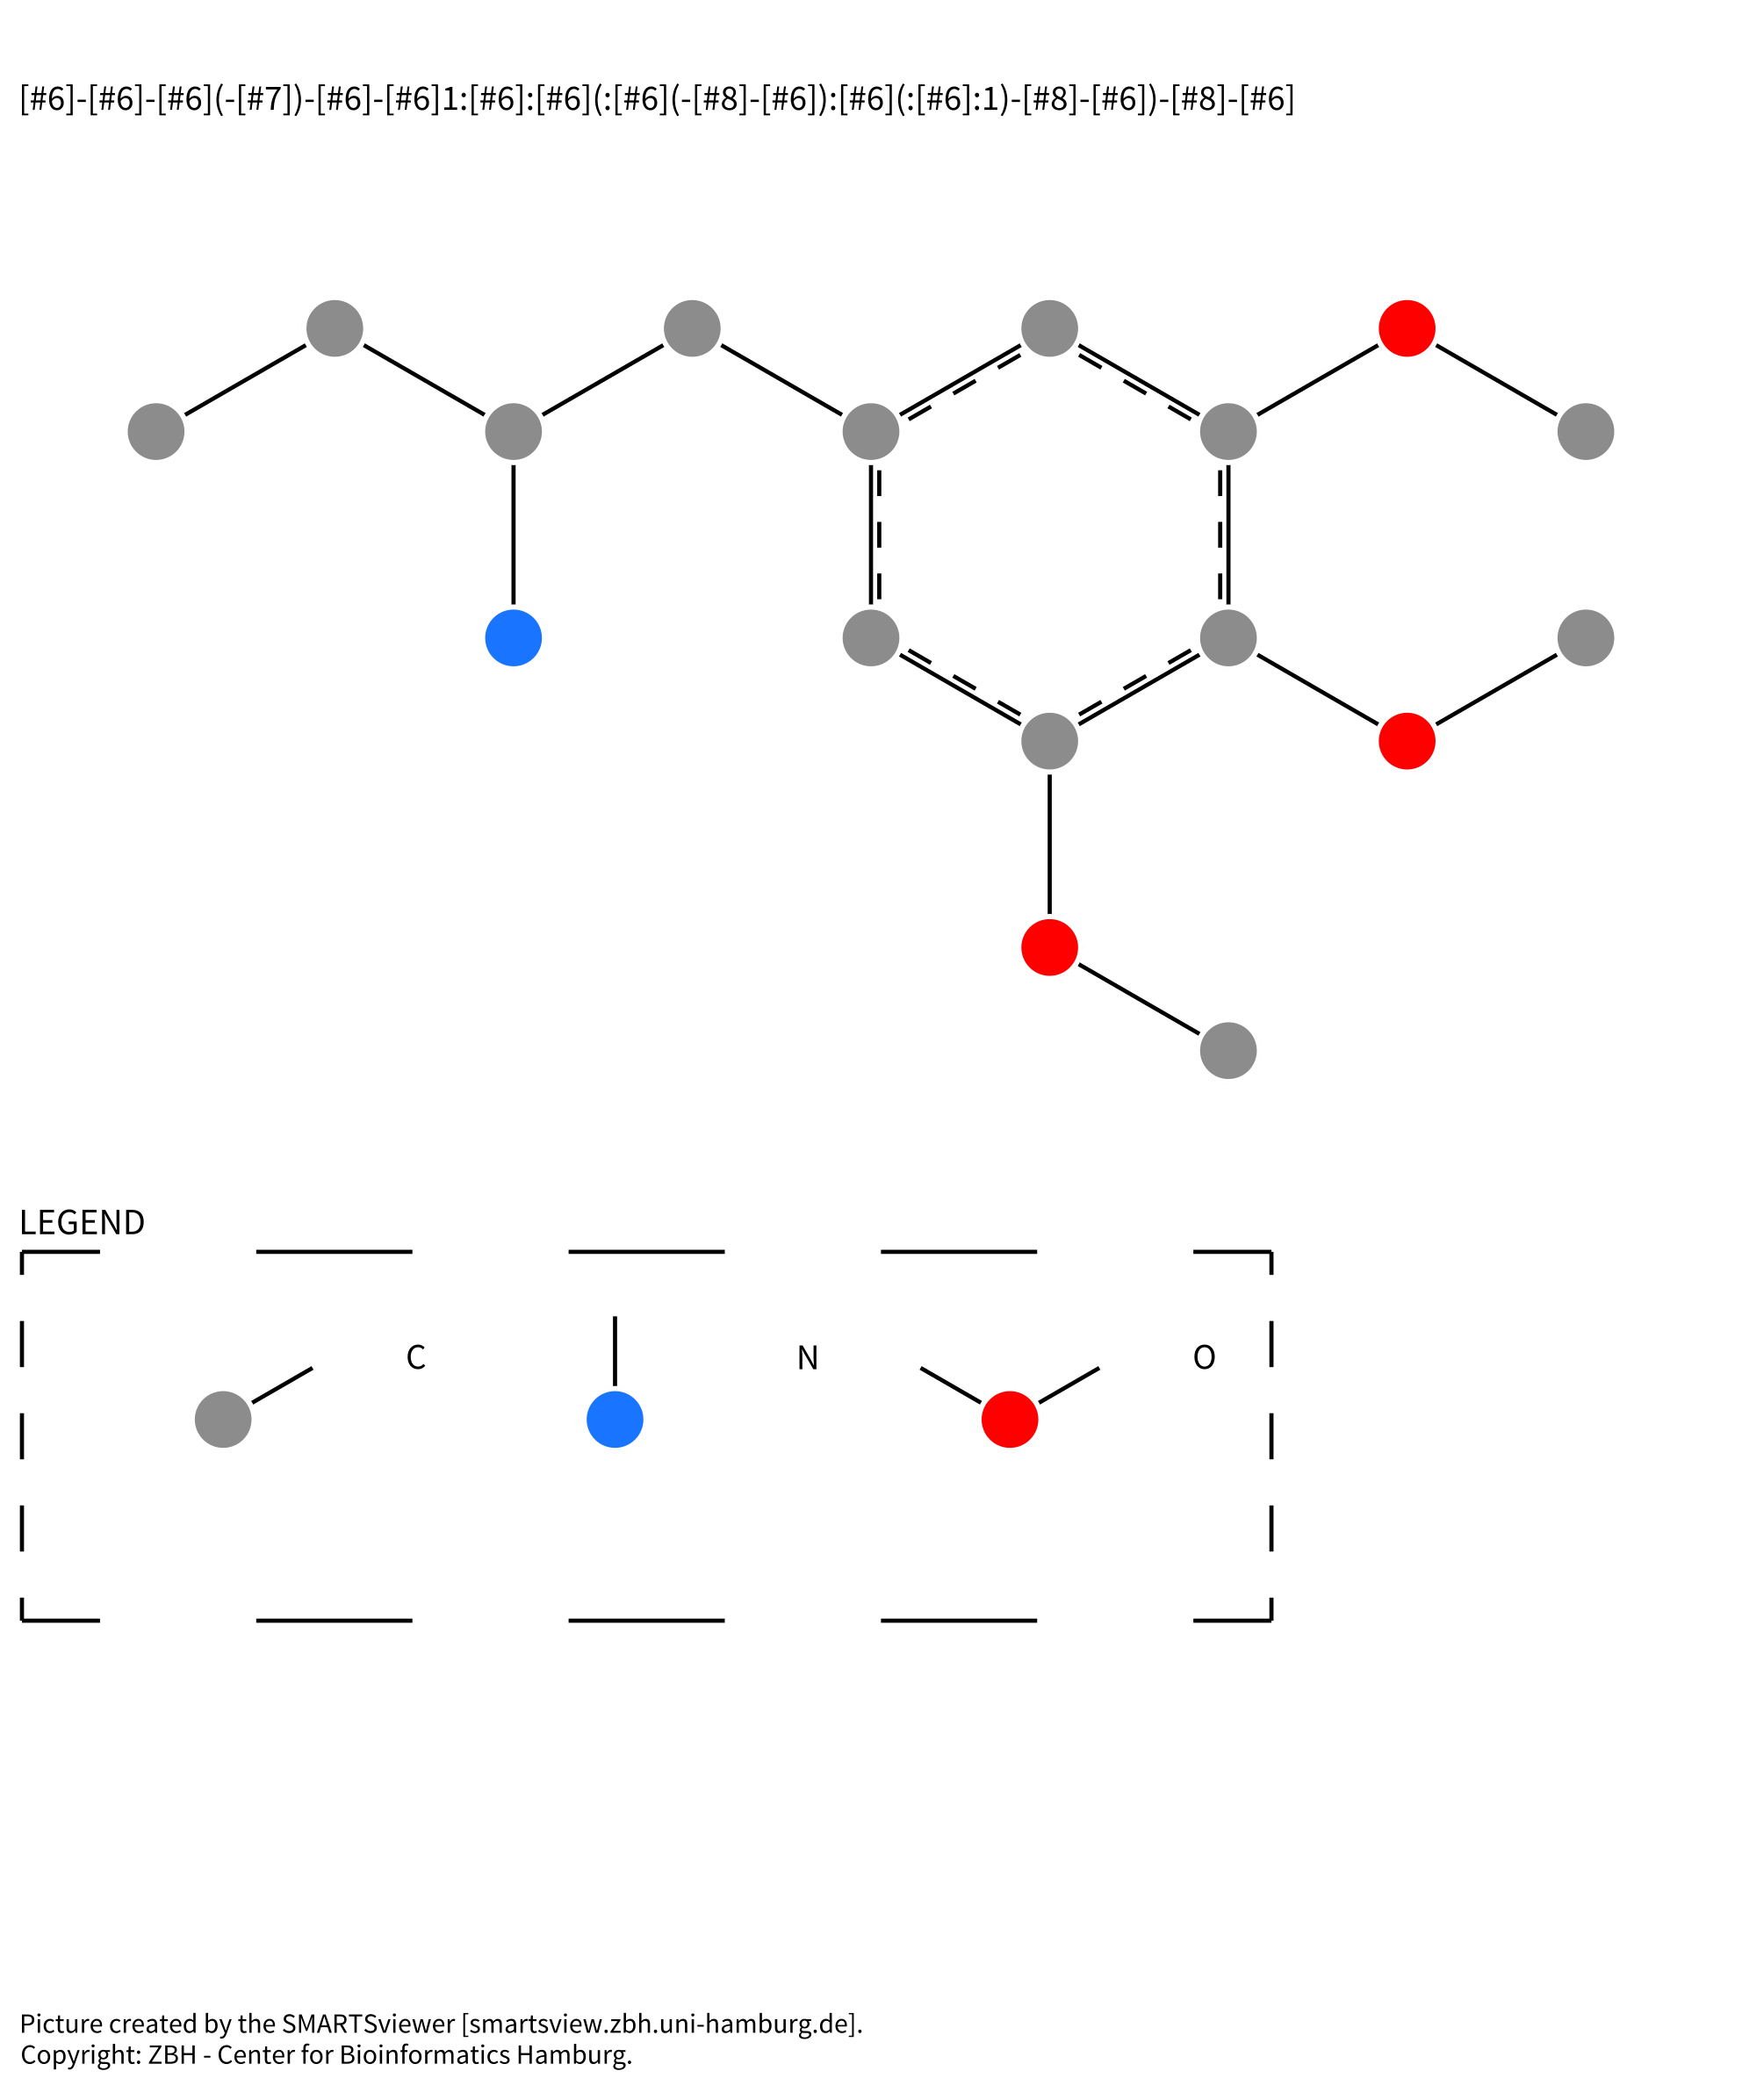

In [ ]:
# Visualize SMARTS 

gc = GlobalChem()
gc.build_global_chem_network(print_output=False, debugger=False)
smarts_list = list(gc.get_node_smarts('pihkal').values())

molecule = gce.visualize_smarts(smarts_list[0])
molecule